<a href="https://colab.research.google.com/github/koushikkirugulige/Football-Analytics/blob/master/PassClusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/statsbomb/open-data.git

Cloning into 'open-data'...
remote: Enumerating objects: 760, done.
remote: Counting objects: 100% (760/760), done.
remote: Compressing objects: 100% (367/367), done.
remote: Total 9482 (delta 640), reused 504 (delta 384), pack-reused 8722
Receiving objects: 100% (9482/9482), 991.55 MiB | 26.66 MiB/s, done.
Resolving deltas: 100% (8387/8387), done.
Checking out files: 100% (1648/1648), done.


In [0]:
#5503

#change this cell to change season and player name
season = '2009/2010'
ssn = '5503'
length = int(20)

In [3]:
import os
import json
from pandas.io.json import json_normalize
import codecs
import pandas as pd
import codecs
main_df = pd.DataFrame(data=None)
path_match = "/content/open-data/data/events/" #location for play by play events
for root, dirs, files in os.walk(r'/content/open-data/data/matches'):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            with codecs.open(root + str('/') + file,encoding='utf-8') as data_file:
                data = json.load(data_file)
                df = pd.DataFrame(data=None)
                df = json_normalize(data, sep = "_")
            #for x in df.competition_country_name:
            #    if x == 'Spain':
            #        print(df.match_id)
            for i in range(len(df)):
                if df.iloc[i]['competition_country_name'] == 'Spain'  and df.iloc[i]['season_season_name'] == season :
                    match_no = df.iloc[i]['match_id'] #gets match with Spain as country
                    match_no = str(match_no) # from int to str 
                    with codecs.open(path_match + match_no + str(r'.json'),encoding="utf8") as event_file: #open the respective file
                        df_match = json.load(event_file)
                        df_match2 = pd.DataFrame(data=None)
                        df_match2 = json_normalize(df_match,sep="_")    
             
                    main_df = main_df.append(df_match2,ignore_index=True,sort=False)                    
print('Done')

Done


In [0]:
messi_df = main_df.query('type_id == 30 & player_id == 5503')

In [0]:
messi_df = messi_df[['location','pass_end_location','pass_height_name','pass_type_name','pass_body_part_name']]

In [6]:
messi_df.head()

,location,pass_end_location,pass_height_name,pass_type_name,pass_body_part_name
29,"[29.5, 55.8]","[33.1, 48.1]",Low Pass,NaN,Left Foot
99,"[64.7, 72.8]","[57.2, 74.5]",Ground Pass,NaN,Left Foot
111,"[64.4, 73.7]","[54.1, 42.1]",Ground Pass,NaN,Left Foot
140,"[80.6, 33.0]","[73.3, 43.8]",Ground Pass,NaN,Right Foot
155,"[97.9, 46.4]","[115.5, 53.8]",Ground Pass,NaN,Left Foot


In [0]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1, fill = False)
    centreSpot = plt.Circle((60,40),0.71)
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71)
    rightPenSpot = plt.Circle((110.3,40),0.71)
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50)
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230)
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

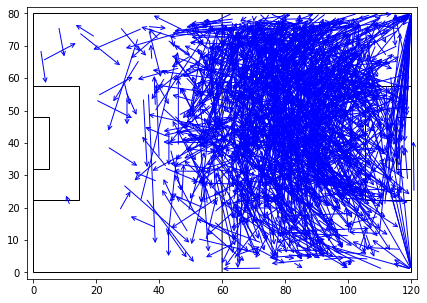

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage

fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
#plt.plot(x_axis,y_axis,'ro')
#plt.plot(x,y,'bo')
#plt.axis('off')

for i in range(len(messi_df)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (messi_df.iloc[i]['pass_end_location'][0], messi_df.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (messi_df.iloc[i]['location'][0], messi_df.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
"""
for i in range(len(assist)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (assist.iloc[i]['pass_end_location'][0], assist.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (assist.iloc[i]['location'][0], assist.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"),)
"""

plt.show()

In [0]:
messi_df[['X','Y']] = pd.DataFrame(messi_df.location.values.tolist(), index= messi_df.index)
messi_df[['endX','endY']] = pd.DataFrame(messi_df.pass_end_location.values.tolist(), index= messi_df.index)

In [10]:
messi_df

,location,pass_end_location,pass_height_name,pass_type_name,pass_body_part_name,X,Y,endX,endY
29,"[29.5, 55.8]","[33.1, 48.1]",Low Pass,NaN,Left Foot,29.5,55.8,33.1,48.1
99,"[64.7, 72.8]","[57.2, 74.5]",Ground Pass,NaN,Left Foot,64.7,72.8,57.2,74.5
111,"[64.4, 73.7]","[54.1, 42.1]",Ground Pass,NaN,Left Foot,64.4,73.7,54.1,42.1
140,"[80.6, 33.0]","[73.3, 43.8]",Ground Pass,NaN,Right Foot,80.6,33.0,73.3,43.8
155,"[97.9, 46.4]","[115.5, 53.8]",Ground Pass,NaN,Left Foot,97.9,46.4,115.5,53.8
...,...,...,...,...,...,...,...,...,...
127962,"[69.9, 56.5]","[75.1, 73.7]",Ground Pass,NaN,Left Foot,69.9,56.5,75.1,73.7
127969,"[85.4, 60.7]","[90.3, 62.4]",Ground Pass,NaN,Right Foot,85.4,60.7,90.3,62.4
128096,"[75.3, 47.8]","[93.0, 45.7]",Ground Pass,NaN,Right Foot,75.3,47.8,93.0,45.7
128221,"[87.9, 26.6]","[81.4, 37.8]",Ground Pass,NaN,Left Foot,87.9,26.6,81.4,37.8


In [0]:
from sklearn.cluster import KMeans
import numpy as np

In [0]:
np.random.seed(42)

In [0]:
# Create training data for clustering
training_data = []
training_data = messi_df[['X','Y','endX','endY']].to_numpy()

In [0]:
cluster_model = KMeans(n_clusters=25).fit(training_data)

In [0]:
cluster_df = pd.DataFrame(data=cluster_model.cluster_centers_,columns= ['X','Y','endX','endY'])

In [16]:
cluster_df.head()

,X,Y,endX,endY
0,69.526437,73.794253,61.916092,70.040230
1,91.892045,33.001136,104.770455,24.712500
2,56.681333,40.832000,50.676000,40.288000
3,86.620000,48.557778,96.874444,34.186667
4,78.813235,36.172059,83.302941,49.801471


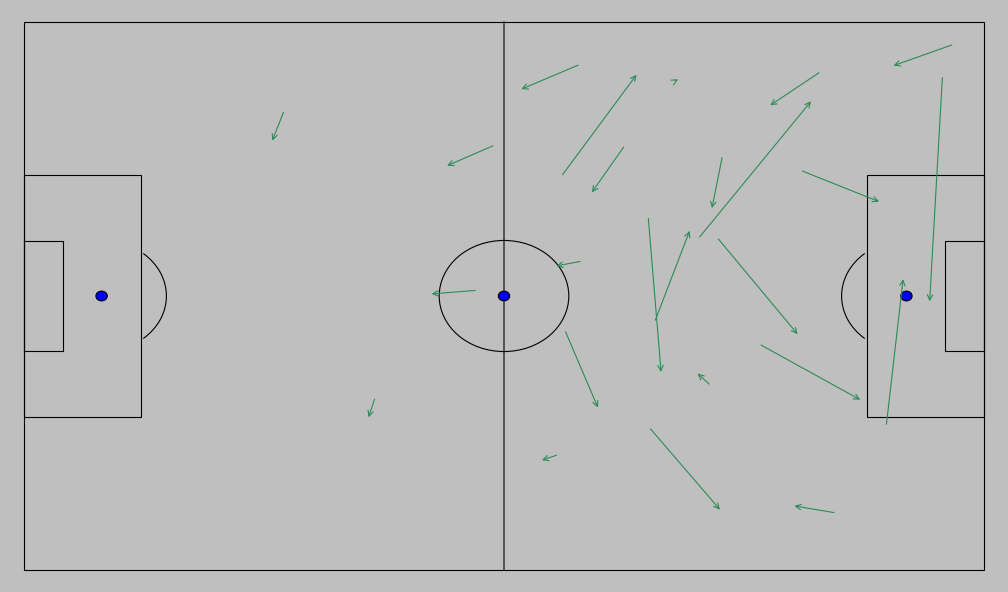

In [36]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
plt.style.use('classic')
fig=plt.figure() #set up the figures
fig.set_size_inches(16, 9)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
y_cary_end = 0
y_loc = 0
ax.set_facecolor("grey")
for i in range(len(cluster_df)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (cluster_df.iloc[i]['endX'], cluster_df.iloc[i]['endY']), xycoords = 'data',
               xytext = (cluster_df.iloc[i].X, cluster_df.iloc[i].Y), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "seagreen"),)
"""
for i in range(len(assist)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (assist.iloc[i]['pass_end_location'][0], assist.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (assist.iloc[i]['location'][0], assist.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="fancy",connectionstyle="arc3", color = "red"),)
"""

plt.show()